In [1]:
import importlib
import copy

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [2]:
# TODO: move all the stuff from decision trees fit into predict, similar to kNN
# TODO: do the same for Random Forest

ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "high", "above average", "average", "below average", "low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

X_copy = copy.deepcopy(ski_X)
y_copy = copy.deepcopy(ski_y)
for i, row in enumerate(X_copy):
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_num_slopes(row[1])
    row[2] = myutils.discretize_snowfall(row[2])
    y_copy[i] = discretizer(y_copy[i])

## kNN classification of ski dataset

In [ ]:
# TODO: modify categorical method in kNN to be a given list
knn_clf = MyKNeighborsClassifier()

knn_actual, knn_pred, knn_accuracy, knn_error = myevaluation.cross_val_predict\
    (ski_X, ski_y, knn_clf, discretizer=discretizer, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(knn_actual, knn_pred)
print(knn_actual[:20])
print(knn_pred[:20])

print(f"Accuracy: {knn_accuracy}, Error Rate: {knn_error}")
print()

matrix = myevaluation.confusion_matrix(knn_actual, knn_pred, matrix_headers[1:6])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

# Naive Bayes Classification

In [ ]:
nb_X = copy.deepcopy(X_copy)
nb_y = copy.deepcopy(y_copy)

nb_clf = MyNaiveBayesClassifier()
nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.cross_val_predict\
    (nb_X, nb_y, nb_clf, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(nb_actual, nb_pred)
print(nb_actual[:20])
print(nb_pred[:20])

print(f"Accuracy: {nb_accuracy}, Error Rate: {nb_error}")
print()

matrix = myevaluation.confusion_matrix(nb_actual, nb_pred, matrix_headers[1:6])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

['below average', 'average', 'high', 'average', 'low', 'high', 'below average', 'low', 'above average', 'low', 'high', 'average', 'high', 'high', 'average', 'average', 'average', 'low', 'average', 'low']
['low', 'below average', 'high', 'average', 'low', 'high', 'below average', 'low', 'below average', 'low', 'high', 'low', 'high', 'average', 'average', 'average', 'low', 'below average', 'average', 'below average']
Accuracy: 0.5197929354445798, Error Rate: 0.48020706455542017

rating           high    above average    average    below average    low    Total    Recognition (%)
-------------  ------  ---------------  ---------  ---------------  -----  -------  -----------------
high              364               97         21                0     11      493                 73
above average     137              202        266               31     22      658                 30
average            33              140        569              171     73      986                 57
below av

In [ ]:
# TODO: ask Professor Sprint where part 4 of random forest should be implemented - in predict?
# TODO: ask Professor Sprint how we should handle our categorical decision tree issue - discretizer for X attributes?
rf_X = copy.deepcopy(X_copy)
rf_y = copy.deepcopy(y_copy)

forest_clf = MyRandomForestClassifier()

# using N=5, M=3, F=2 as a "control"
X_test, y_test = forest_clf.fit(rf_X, rf_y, 50, 3, 2)
forest_pred = forest_clf.predict(X_test)

forest_accuracy = myevaluation.accuracy_score(y_test, forest_pred)
forest_error = 1 - forest_accuracy

forest_actual = y_test

print(f"Accuracy: {forest_accuracy}, Error Rate: {forest_error}")
print()

# matrix = myevaluation.confusion_matrix(forest_actual, forest_pred, matrix_headers[1:8])
# print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

Accuracy: 0.5269406392694064, Error Rate: 0.4730593607305936



## Data Visualizations

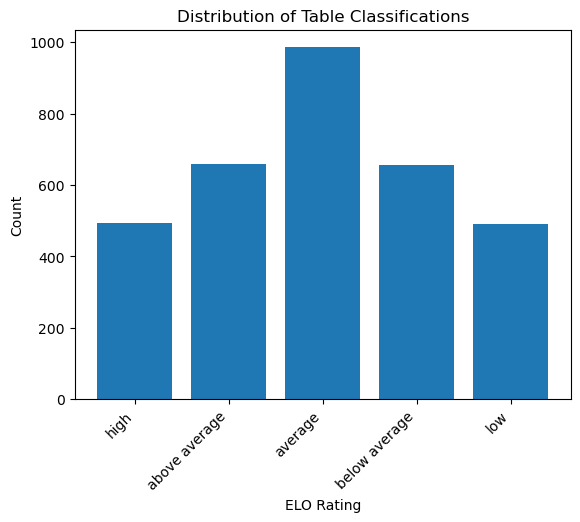

size of knn_pred 3284


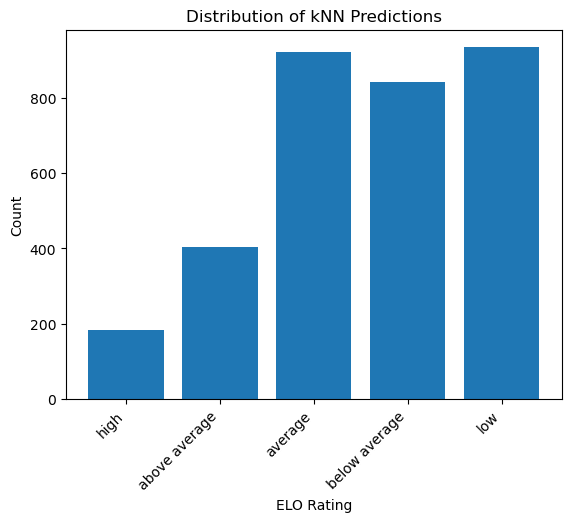

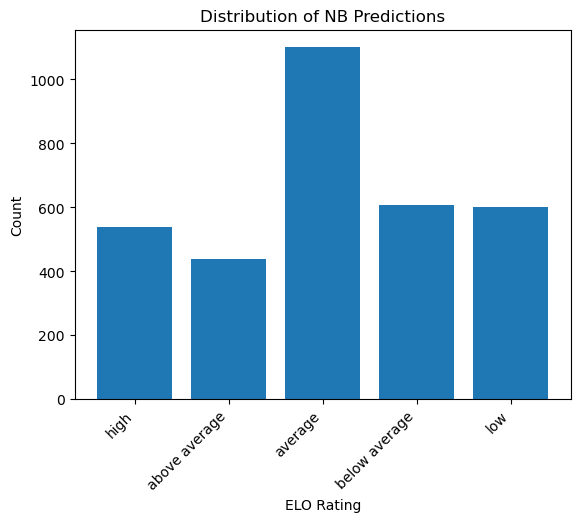

In [ ]:
import matplotlib.pyplot as plt

# will make own method
y_disc = [discretizer(y) for y in ski_y]
values, counts = myutils.get_frequencies(y_disc)

order = [3, 0, 1, 2, 4]
ordered_values = [values[i] for i in order]
ordered_counts = [counts[i] for i in order]

plt.figure()
plt.bar(ordered_values, ordered_counts)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of Table Classifications")
plt.xticks(rotation=45, ha="right")
plt.show()

# knn visualization
values_knn, counts_knn = myutils.get_frequencies(knn_pred)
print("size of knn_pred", len(knn_pred))
ordered_values_knn = [values_knn[i] for i in order]
ordered_counts_knn = [counts_knn[i] for i in order]

plt.figure()
plt.bar(ordered_values_knn, ordered_counts_knn)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of kNN Predictions")
plt.xticks(rotation=45, ha="right")
plt.show()

# nb visualization
values_nb, counts_nb = myutils.get_frequencies(nb_pred)
ordered_values_nb = [values_nb[i] for i in order]
ordered_counts_nb = [counts_nb[i] for i in order]

plt.figure()
plt.bar(ordered_values_nb, ordered_counts_nb)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of NB Predictions")
plt.xticks(rotation=45, ha="right")
plt.show()